# National Water Demand Predictions for the Municipal Sector
Developed by Maura Allaire

County-level predictions of municipal water use were made for year 2010. These predictions represent an improvement over county-level data available for domestic use from the USGS Water Census.  The Water Census provides approximations of withdrawals within a given county. It does not provide information on end user water demand.  This is particularly an issue in countries that are the source or receiver of large water transfers.  In addition, in most water census years, county-level water use data for the domestic sector is not reported for several states. In these cases, approximations from previous Census years are used, with or without scaling for population change.

The Columbia Water Center developed improved predictions of county-level water use by creating a regression model of water sales on price, climate, and demographic characteristics.  In year 2010, the demand regression included 265 water utilities and over 54% of the variance in water sales was explained by the specified model.

## Data

Water use and price data were obtained from Water and Wastewater Rate Surveys produced by the American Water Works Association (AWWA). These biannual surveys provide utility-level information on water use and rates for public water systems in the U.S.  The analysis in this study focuses on survey data from 2000 to 2010.  Average water price was calculated based on the price faced by a user with average use for a given utility service area.  

Climate variables, including average monthly precipitation and temperature, were obtained from daily 1/8-degree gridded meteorological estimates by Maurer et al. (2002).  Gridded estimates were aggregated to a county-level by Tara Troy, using the VIC model 

Demographic characteristics were obtained from the U.S. Census and include median household income, % college degree or more, % unemployment, # business establishments, average household size, housing density, median housing value, median year housing built, % owner-occupied dwellings.

## Comparison with USGS Water Census
Columbia Water Center predictions tend to be higher than reported water use from the USGS Water Census (variable: dopspcp)

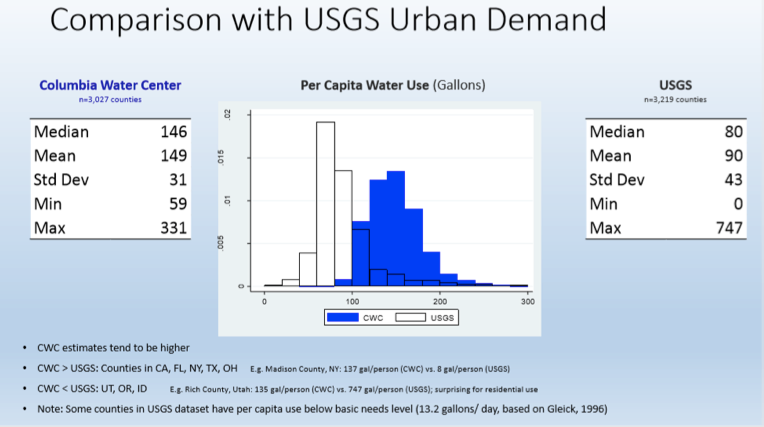

## Comparison in the model

Construct the AWASH environment:

In [1]:
using DataFrames
include("../src/lib/readconfig.jl")
include("../src/lib/datastore.jl")
suffix = "";

In [2]:
mastercounties = readtable(datapath("global/counties$suffix.csv"), eltypes=[String, String, String]);

Attempting to load the data (showing what happens if you don't have everything setup):

In [4]:
config = emptyconfig()
config["urbandemand-path"] = "demand/urbandemand_May11.csv"
config["urbandemand-column"] = "per_capita"
config["urbandemand-transform"] = "repcap"
col2 = configdata("urbandemand", "demand/simulation2010demanddata.csv", :PS_WTotl, :regions);

LoadError: LoadError: There are not 3109 entries, but no urbandemand-index configuration specified.
while loading In[4], in expression starting on line 4

In [5]:
config["urbandemand-index"] = "FIPS_county"
col2 = configdata("urbandemand", "demand/simulation2010demanddata.csv", :PS_WTotl, :regions);

LoadError: LoadError: The PopulationDemand component needs to be loaded first.
while loading In[5], in expression starting on line 2

Finally, load the data:

In [6]:
include("../src/PopulationDemand.jl")
col2 = configdata("urbandemand", "demand/simulation2010demanddata.csv", :PS_WTotl, :regions);

A quick comparison:

In [7]:
DataFrame(fips=mastercounties[:fips], surveyed=col1, estimated=col2)

,fips,surveyed,estimated
1,01001,7038.1,9646.785578166
2,01003,31761.3,41999.195453175
3,01005,5738.3,7440.535253222
4,01007,6761.6,4971.888792205
5,01009,5351.6,11952.297234796
6,01011,3180.3,2133.49371306
7,01013,3733.4,4791.047861436
8,01015,32217.6,27618.908848248
9,01017,5959.6,7539.569498999999
10,01019,4825.7,5708.207924787
